# Group by


eps=f(%messages)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


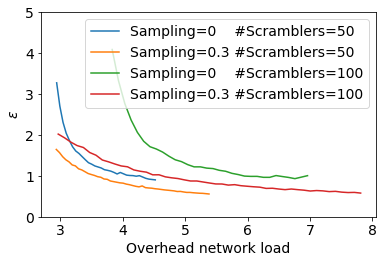

In [16]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

erase=False
tau=20
delta = 1e-4
nb_runs=4000
Plies=[0.001,0.3]
contrib_utile=10000
Nbscramblers=[50,100]
dmax=500

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf)-tradeoffs,tau_{},delta_{},dmax_{},Plies_{},Nbscramblers_{},nb_runs_{}'.format(tau,delta,dmax,Plies,Nbscramblers,nb_runs)



for nb in Nbscramblers:
    for P in Plies:
        S_total=int(contrib_utile/(1-P))
        if P<0.1:
            legend['P={},Nbscramblers={}'.format(P,nb)]="Sampling={}    #Scramblers={}".format(0,nb)
        else:
            legend['P={},Nbscramblers={}'.format(P,nb)]="Sampling={} #Scramblers={}".format(P,nb)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    

else:
    

    for nb in Nbscramblers:
        for P in Plies:
            y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]
            x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]


    for d in range(10,dmax,10): 
        print("d=",d,end="\r",flush=True)
        for nb in Nbscramblers:
            for P in Plies:
                S_total=int(contrib_utile/(1-P))
                n=int(S_total/nb)
                y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(number_of_messages_GB(tau,S_total,n,d)/(contrib_utile))


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


i=restore("t1")
j=restore("t2")


for t in range(1,len(i)-1):
    i[t]=(i[t-1]+i[t+1])/2

    
for t in range(1,len(j)-1):
    j[t]=(j[t-1]+j[t+1])/2

y_coordinates_dict['P={},Nbscramblers={}'.format(0.001,50)]=i
y_coordinates_dict['P={},Nbscramblers={}'.format(0.001,100)]=j
        
m=0   


for nb in Nbscramblers:
    for P in Plies:
        S_total=int(contrib_utile/(1-P))
        if P<0.1:
            m=17
        else:
            m=0
        plt.plot(x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)][m:], y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)][m:], label=legend['P={},Nbscramblers={}'.format(P,nb)])

    
plt.legend()

"""plt.annotate('$\\varepsilon=1$', xy=(4.5, 1), xytext=(4.6, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )"""


"""X=[3,8]
Y=[1,1]
plt.plot(X, Y,'k--')
"""
plt.xlabel('Overhead network load')
plt.ylabel('$\\varepsilon$')

#plt.xlim(2.8, 7)
plt.ylim(0, 5)

saveFig(name)
saveFig2("fig7a")
##################################################








    

eps=f(nb secure channels) (Plie fixé)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


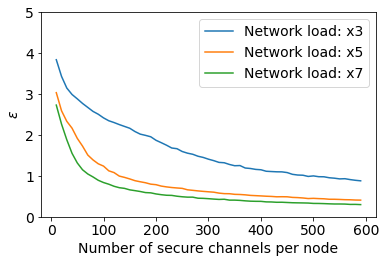

In [2]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

def allowed_d(rate,sampling,n):
    d=int(rate*(1-sampling)*n-2*n)
    return max(0,d)

erase=False
tau=20
delta = 1e-4
nb_runs=4000
Plies=[0.2]
contrib_utile=10000
rates=[3,5,7]
nmax=600

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf_securechannels)-tradeoffs,tau_{},delta_{},nmax_{},Plies_{},rates{},nb_runs_{}'.format(tau,delta,nmax,Plies,rates,nb_runs)


for rate in rates:
    for P in Plies:
        legend['P={},rate={}'.format(P,rate)]="Network load: x{}".format(rate)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    


else:
    

    for rate in rates:
        for P in Plies:
            y_coordinates_dict['P={},rate={}'.format(P,rate)]=[]
            x_coordinates_dict['P={},rate={}'.format(P,rate)]=[]


    for n in range(10,nmax,10): 
        print("n=",n,end="\r",flush=True)
        for rate in rates:
            for P in Plies:
                d=allowed_d(rate,P,n)
                y_coordinates_dict['P={},rate={}'.format(P,rate)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},rate={}'.format(P,rate)].append(n)


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

"""plt.annotate('$\\varepsilon=1$', xy=(300, 1), xytext=(300, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )"""


"""X=[0,600]
Y=[1,1]
plt.plot(X, Y,'k--')
"""
plt.xlabel('Number of secure channels per node')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
plt.ylim(0,5)

saveFig(name)
saveFig2("fig7b")
##################################################








    

eps=f(number of  consent) (d fixé)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


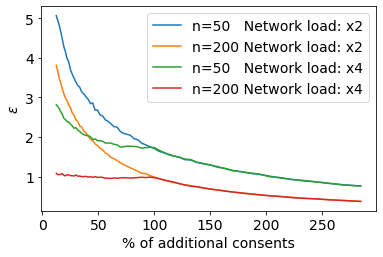

In [11]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

def allowed_d(rate,sampling,n):
    d=int(rate*(1-sampling)*n-2*n)
    return max(0,d)

erase=False
tau=20
delta = 1e-4
nb_runs=4000
contrib_utile=10000
rates=[2,4]
ns=[50,200]

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(numberofconsent)-tradeoffs,tau_{},delta_{},ns{},rates{},nb_runs_{}'.format(tau,delta,ns,rates,nb_runs)


for rate in rates:
    for n in ns:
        if n==50:
            legend['n={},rate={}'.format(n,rate)]="n={}   Network load: x{}".format(n,rate)
        else:
            legend['n={},rate={}'.format(n,rate)]="n={} Network load: x{}".format(n,rate)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    


else:
    

    for rate in rates:
        for n in ns:
            y_coordinates_dict['n={},rate={}'.format(n,rate)]=[]
            x_coordinates_dict['n={},rate={}'.format(n,rate)]=[]

    P=0.01
    while P < 0.75: 
        print("P=",P,end="\r",flush=True)
        for rate in rates:
            for n in ns:
                d=allowed_d(rate,P,n)
                y_coordinates_dict['n={},rate={}'.format(n,rate)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['n={},rate={}'.format(n,rate)].append(((1/(1-P))-1)*100)

        P=round(P+0.01,2)
    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


m=10  
for rate in rates:
    for n in ns:
        plt.plot(x_coordinates_dict['n={},rate={}'.format(n,rate)][m:], y_coordinates_dict['n={},rate={}'.format(n,rate)][m:], label=legend['n={},rate={}'.format(n,rate)])

           

plt.legend()

"""plt.annotate('$\\varepsilon=1$', xy=(150, 1), xytext=(150, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )
"""

"""X=[0,300]
Y=[1,1]
plt.plot(X, Y,'k--')"""

plt.xlabel('% of additional consents')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0,5)

saveFig(name)
saveFig2("fig7c")
##################################################








    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


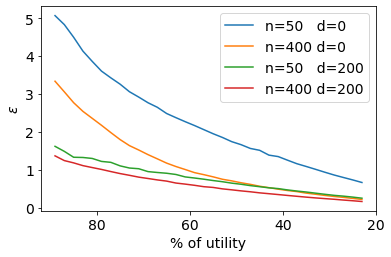

In [15]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *



erase=False
tau=20
delta = 1e-4
nb_runs=4000
contrib_utile=10000
rates=[2,4]
ns=[50,400]
ds=[0,200]

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(utility)-tradeoffs,tau_{},delta_{},ns{},ds{},rates{},nb_runs_{}'.format(tau,delta,ns,ds,rates,nb_runs)


for d in ds:
    for n in ns:
        if n==50:
            legend['n={},d={}'.format(n,d)]="n={}   d={}".format(n,d)
        else:
            legend['n={},d={}'.format(n,d)]="n={} d={}".format(n,d)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    


else:
    

    for d in ds:
        for n in ns:
            y_coordinates_dict['n={},d={}'.format(n,d)]=[]
            x_coordinates_dict['n={},d={}'.format(n,d)]=[]

    P=0.01
    while P < 0.9: 
        print("P=",P,end="\r",flush=True)
        for d in ds:
            for n in ns:
                y_coordinates_dict['n={},d={}'.format(n,d)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['n={},d={}'.format(n,d)].append((1-P)*100)

        P=round(P+0.02,2)
    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           
m=5
o=-6
for d in ds:
    for n in ns:
        plt.plot(x_coordinates_dict['n={},d={}'.format(n,d)][m:o], y_coordinates_dict['n={},d={}'.format(n,d)][m:o], label=legend['n={},d={}'.format(n,d)])
            
plt.legend()            

"""plt.annotate('$\\varepsilon=1$', xy=(50, 1), xytext=(50, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )"""


"""X=[20,100]
Y=[1,1]
plt.plot(X, Y,'k--')"""

plt.xlabel('% of utility')
plt.ylabel('$\\varepsilon$')


plt.xlim(92, 20)
#plt.ylim(0, 5.2)

saveFig(name)
saveFig2("fig7d")
##################################################








    